In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
def loss_fn(x, y):
    return x**2 + 10 * y**2

def grad_fn(x, y):
    return np.array([2 * x, 20 * y])

In [26]:
def optimize(optimizer_name, lr=0.1, steps=50):
    x, y = -4.0, 4.0
    path = [(x, y)]
    eps = 1e-8

    # For Momentum and RMSprop
    v = np.array([0.0, 0.0])
    s = np.array([0.0, 0.0])
    beta = 0.9

    for _ in range(steps):
        grad = grad_fn(x, y)

        if optimizer_name == 'SGD':
            update = lr * grad

        elif optimizer_name == 'Momentum':
            v = beta * v + lr * grad
            update = v

        elif optimizer_name == 'RMSprop':
            s = beta * s + (1 - beta) * grad**2
            update = lr * grad / (np.sqrt(s) + eps)

        x -= update[0]
        y -= update[1]
        path.append((x, y))

    return np.array(path)

In [27]:
def optimize_adam(lr=0.1, steps=50):
    x, y = -4.0, 4.0
    path = [(x, y)]
    eps = 1e-8
    beta1 = 0.9
    beta2 = 0.999

    m = np.array([0.0, 0.0])
    v = np.array([0.0, 0.0])

    for t in range(1, steps + 1):
        grad = grad_fn(x, y)

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Bias correction
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        update = lr * m_hat / (np.sqrt(v_hat) + eps)

        x -= update[0]
        y -= update[1]
        path.append((x, y))

    return np.array(path)

In [28]:
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_fn(X, Y)

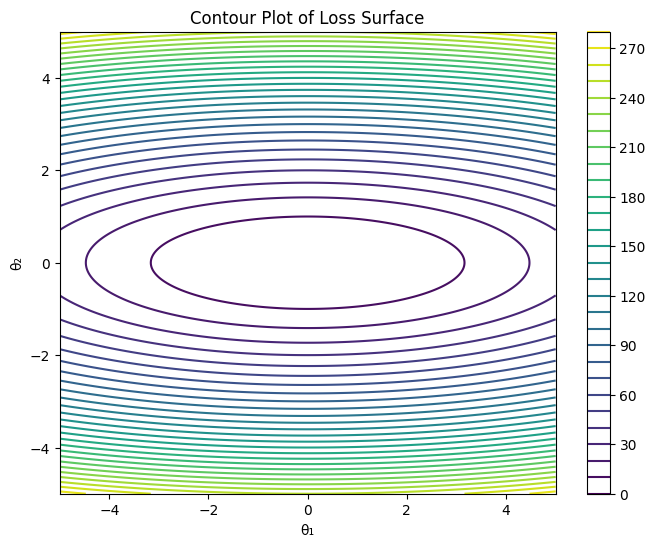

In [29]:
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.title('Contour Plot of Loss Surface')
plt.xlabel('θ₁')
plt.ylabel('θ₂')
plt.colorbar(contours)
plt.savefig("contour_plot_15may_2025.png", dpi=300)

In [30]:
sgd_path = optimize('SGD')
momentum_path = optimize('Momentum')
rmsprop_path = optimize('RMSprop')
adam_path = optimize_adam()

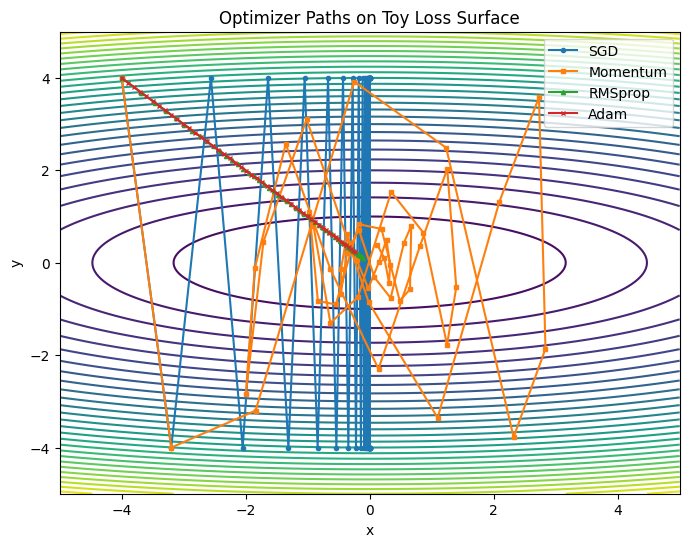

In [32]:
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.plot(*sgd_path.T, label='SGD', marker='o', markersize=3)
plt.plot(*momentum_path.T, label='Momentum', marker='s', markersize=3)
plt.plot(*rmsprop_path.T, label='RMSprop', marker='^', markersize=3)
plt.plot(*adam_path.T, label='Adam', marker='x', markersize=3)

plt.title('Optimizer Paths on Toy Loss Surface')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()